In [1]:
from helper.dataset_reader import read_tsv
from lang_id_crf import *
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
langid = LanguageIdentifier()

## Scenario 3:
1. Merge training and test data
2. Include named entity


 Evaluation on the test data
Confusion Matrix
              precision    recall  f1-score   support

          ID       0.89      0.97      0.93     16311
          JV       0.85      0.85      0.85      4641
          EN       0.92      0.68      0.79      2218
          NE       0.84      0.39      0.53      1013
           O       0.99      0.96      0.97      6508
   MIX-ID-EN       0.98      0.86      0.92       852
   MIX-ID-JV       0.97      0.82      0.89       286
   MIX-JV-EN       0.96      0.82      0.89       250

    accuracy                           0.91     32079
   macro avg       0.93      0.79      0.84     32079
weighted avg       0.91      0.91      0.90     32079



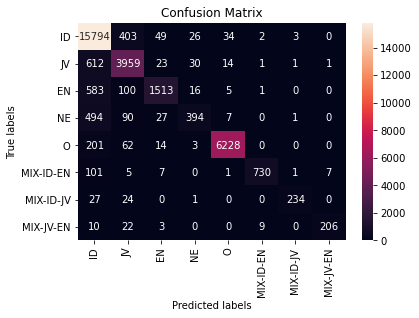


 Evaluation on the training data
Confusion Matrix
              precision    recall  f1-score   support

          ID       0.96      0.99      0.97     32818
          JV       0.93      0.94      0.94      9183
          EN       0.98      0.92      0.95      4405
          NE       0.98      0.83      0.90      2273
           O       1.00      0.98      0.99     12808
   MIX-ID-EN       0.99      0.97      0.98      1833
   MIX-ID-JV       1.00      0.90      0.95       544
   MIX-JV-EN       0.97      0.93      0.95       533

    accuracy                           0.97     64397
   macro avg       0.98      0.93      0.95     64397
weighted avg       0.97      0.97      0.97     64397



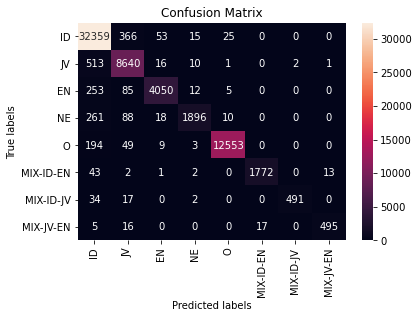


Top likely transitions:
O          -> O          5.17360
EN         -> O          4.11583
ID         -> O          4.06027
JV         -> O          3.73404
NE         -> O          3.72964
MIX-ID-EN  -> O          3.46917
MIX-JV-EN  -> O          3.33946
MIX-ID-JV  -> O          3.07989
NE         -> NE         1.95126
EN         -> EN         1.72254
JV         -> JV         1.25530
EN         -> NE         1.00035
ID         -> NE         0.90015
ID         -> ID         0.79578
O          -> ID         0.65266
JV         -> MIX-JV-EN  0.61866
O          -> EN         0.60931
O          -> JV         0.56891
JV         -> NE         0.49632
O          -> NE         0.48452

Top unlikely transitions:
NE         -> EN         -0.54049
MIX-ID-JV  -> ID         -0.60640
MIX-JV-EN  -> EN         -0.69430
ID         -> JV         -0.91559
MIX-ID-JV  -> EN         -0.98399
MIX-JV-EN  -> MIX-ID-JV  -1.06229
EN         -> MIX-JV-EN  -1.06852
NE         -> MIX-ID-JV  -1.09633
JV         -> ID

In [3]:
dataset = read_tsv('../raw dataset/all-tagged-090422-merged.tsv')
langid.train_test_result(data=dataset, test_size=0.33, n_label=8, model_name='mod_090422.pkl')

In [4]:
import eli5
eli5.show_weights(langid.model, horizontal_layout=False)